In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [33]:
df = pd.read_csv("sensor-nodes.csv")
df.head(10)


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-2023 00:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-2023 00:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-2023 00:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-2023 00:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-2023 00:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0
5,6,01-02-2023 00:05,192.168.230.20,42.539308,1.777329,1.226797,140.306629,-48.164891,22.562783,80.792853,...,3,9.100424,10.912167,17.039896,17.098904,0.095630,41.592922,37.011924,135.173141,0
6,7,01-02-2023 00:06,192.168.201.178,34.371305,2.122728,1.238309,82.759149,-46.749541,22.199859,83.896476,...,5,5.514884,9.764031,14.729525,14.537270,0.112991,51.911647,33.413317,113.722314,0
7,8,01-02-2023 00:07,192.168.0.73,39.421713,1.632756,1.070672,128.744279,-47.965449,22.017101,73.018853,...,3,8.785059,7.424502,14.028956,16.584326,0.150733,43.373535,32.514071,101.301618,0
8,9,01-02-2023 00:08,192.168.35.14,64.392638,1.771348,0.614431,105.554913,-45.030005,19.406187,100.505321,...,4,9.652375,9.578266,20.649000,13.220874,0.133769,41.662683,36.024818,130.214575,0
9,10,01-02-2023 00:09,192.168.94.186,71.586404,2.874885,1.175556,109.901877,-43.949902,27.354364,76.642262,...,3,8.413089,14.570255,15.308871,14.962364,0.088105,39.467362,31.086755,130.360976,0


In [121]:
X = df.drop(columns=['Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [35]:
# # scaler = StandardScaler()
# scaler = MinMaxScaler()
# # scaler = RobustScaler()


# X_scaled = scaler.fit_transform(X)


In [122]:
# # LSTM
# X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
#     X, y, test_size=0.2, random_state=40) # x_train, X_test, y_train, y_tests

# X_train_val_lstm, X_val_lstm, y_train_val_lstm, y_val_lstm = train_test_split(
#     X_train_lstm, y_train_lstm, test_size=0.25, random_state=40)  # X_val , x_test, y_val , y_test

# print("Shape of X_train:", X_train_lstm.shape)
# print("Shape of X_test:", X_test_lstm.shape)

# print("Shape of X_val:", X_val_lstm.shape)
# print("Shape of y_val:", y_val_lstm.shape)

# print("Shape of y_train:", y_train_lstm.shape)
# print("Shape of y_test:", y_test_lstm.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)  # train, test  , y tran, y tesr

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (8000, 18)
Shape of X_test: (2000, 18)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [123]:
X_train_val, X_val_test, y_train_val, y_val_test = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42)
# xtrain , y tran
# x_Train, x val and y_tran y val
print("Shape of X_train_val:", X_train_val.shape)
print("Shape of X_val_test:", X_test.shape)

print("Shape of y_train_val:", y_train_val.shape)
print("Shape of X_val_test:", X_val_test.shape)


Shape of X_train_val: (4000, 18)
Shape of X_val_test: (2000, 18)
Shape of y_train_val: (4000,)
Shape of X_val_test: (4000, 18)


In [124]:
# scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = RobustScaler()
# scaler.fit(X_train_lstm)

# X_scaled = scaler.transform(X_train_lstm)
# print("X_scaled: ", X_scaled.shape)

# X_scaled_test = scaler.transform(X_test_lstm)
# print("X_scaled_test: ", X_scaled_test.shape)

# X_val_train = scaler.transform(X_train_val_lstm)
# print("X_Val_train: ", X_val_train.shape)

scaler.fit(X_train)

X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

X_train_val_n = scaler.transform(X_train_val)


In [125]:
if np.isnan(X_train_n).any() or np.isinf(X_train_n).any():
    raise ValueError("NaN or infinite values found in X_train_n")


In [126]:
sequence_length = X_train.shape[1]
num_features = 1
print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)


Sequence length:  18
Num of features:  1


In [127]:
total_samples = len(y_train)

class_0_samples = np.sum(y_train == 0)
class_1_samples = np.sum(y_train == 1)

weight_for_0 = total_samples / (2*class_0_samples)
weight_for_1 = total_samples / (2*class_1_samples)


class_weights = {0: weight_for_0, 1: weight_for_1}


In [130]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(sequence_length, num_features)))
lstm_model.add(Dense(1, activation='relu'))
lstm_model.add(Dropout(0.3))


In [131]:
# Adam Optimizer
lstm_adam_optimizer = Adam(learning_rate=0.01)

lstm_model.compile(optimizer=lstm_adam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_adam_history = lstm_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 3s 7ms/step - loss: 7.7125 - accuracy: 0.9517 - val_loss: 0.7751 - val_accuracy: 0.9498
Epoch 2/10
250/250 [==============================] - 1s 6ms/step - loss: 7.7125 - accuracy: 0.9517 - val_loss: 0.7751 - val_accuracy: 0.9498
Epoch 3/10
250/250 [==============================] - 1s 6ms/step - loss: 7.7125 - accuracy: 0.9517 - val_loss: 0.7751 - val_accuracy: 0.9498
Epoch 4/10
250/250 [==============================] - 2s 6ms/step - loss: 7.7125 - accuracy: 0.9517 - val_loss: 0.7751 - val_accuracy: 0.9498
Epoch 5/10
250/250 [==============================] - 1s 6ms/step - loss: 7.7125 - accuracy: 0.9517 - val_loss: 0.7751 - val_accuracy: 0.9498
Epoch 6/10
250/250 [==============================] - 1s 6ms/step - loss: 7.7125 - accuracy: 0.9517 - val_loss: 0.7751 - val_accuracy: 0.9498
Epoch 7/10
250/250 [==============================] - 1s 6ms/step - loss: 7.7125 - accuracy: 0.9517 - val_loss: 0.7751 - val_accuracy: 0.9498
Epoch 

In [110]:
lstm_nadam_optimizer = Nadam(learning_rate=0.01)


lstm_model.compile(optimizer=lstm_nadam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])


# lstm_nadam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
#                                     epochs=10, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))
lstm_nadam_history = lstm_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 3s 7ms/step - loss: 0.0367 - accuracy: 0.9941 - val_loss: 0.5477 - val_accuracy: 0.9498
Epoch 2/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0101 - accuracy: 0.9958 - val_loss: 0.6045 - val_accuracy: 0.9498
Epoch 3/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0059 - accuracy: 0.9974 - val_loss: 0.4400 - val_accuracy: 0.9498
Epoch 4/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0156 - accuracy: 0.9956 - val_loss: 0.3557 - val_accuracy: 0.9498
Epoch 5/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0270 - accuracy: 0.9912 - val_loss: 0.4450 - val_accuracy: 0.9498
Epoch 6/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.3914 - val_accuracy: 0.9498
Epoch 7/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.3884 - val_accuracy: 0.9498
Epoch 

In [111]:
lstm_adagrad_optimizer = Adagrad(learning_rate=0.01)
lstm_model.compile(optimizer=lstm_adagrad_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_adagrad_history = lstm_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 3s 8ms/step - loss: 0.0110 - accuracy: 0.9976 - val_loss: 0.3414 - val_accuracy: 0.9498
Epoch 2/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0103 - accuracy: 0.9975 - val_loss: 0.3464 - val_accuracy: 0.9498
Epoch 3/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.3493 - val_accuracy: 0.9498
Epoch 4/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0064 - accuracy: 0.9976 - val_loss: 0.3513 - val_accuracy: 0.9498
Epoch 5/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.3527 - val_accuracy: 0.9498
Epoch 6/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0066 - accuracy: 0.9976 - val_loss: 0.3541 - val_accuracy: 0.9498
Epoch 7/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0059 - accuracy: 0.9977 - val_loss: 0.3553 - val_accuracy: 0.9498
Epoch 

In [112]:
lstm_sgd_optimizer = SGD(learning_rate=0.01)

lstm_model.compile(optimizer=lstm_sgd_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_sgd_history = lstm_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 3s 8ms/step - loss: 0.0045 - accuracy: 0.9977 - val_loss: 0.3580 - val_accuracy: 0.9498
Epoch 2/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0049 - accuracy: 0.9979 - val_loss: 0.3586 - val_accuracy: 0.9498
Epoch 3/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0045 - accuracy: 0.9979 - val_loss: 0.3590 - val_accuracy: 0.9498
Epoch 4/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0050 - accuracy: 0.9979 - val_loss: 0.3592 - val_accuracy: 0.9498
Epoch 5/10
250/250 [==============================] - 2s 6ms/step - loss: 0.0066 - accuracy: 0.9971 - val_loss: 0.3595 - val_accuracy: 0.9498
Epoch 6/10
250/250 [==============================] - 2s 6ms/step - loss: 0.0041 - accuracy: 0.9980 - val_loss: 0.3599 - val_accuracy: 0.9498
Epoch 7/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0048 - accuracy: 0.9977 - val_loss: 0.3595 - val_accuracy: 0.9498
Epoch 

In [113]:
lstm_rms_optimizer = RMSprop(learning_rate=0.01)

lstm_model.compile(optimizer=lstm_rms_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_rms_history = lstm_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 3s 7ms/step - loss: 0.0151 - accuracy: 0.9965 - val_loss: 0.3686 - val_accuracy: 0.9498
Epoch 2/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.3262 - val_accuracy: 0.9498
Epoch 3/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.2030 - val_accuracy: 0.9495
Epoch 4/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0096 - accuracy: 0.9980 - val_loss: 0.2592 - val_accuracy: 0.9498
Epoch 5/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0103 - accuracy: 0.9981 - val_loss: 0.2385 - val_accuracy: 0.9492
Epoch 6/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.3430 - val_accuracy: 0.9492
Epoch 7/10
250/250 [==============================] - 2s 6ms/step - loss: 0.0164 - accuracy: 0.9975 - val_loss: 0.3064 - val_accuracy: 0.9495
Epoch 

In [114]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print("Test LSTM Loss: ", lstm_loss)
print("Test LSTM Accuracy: ", lstm_accuracy)


63/63 [==============================] - 0s 3ms/step - loss: 1.3518 - accuracy: 0.0480
Test LSTM Loss:  1.3517701625823975
Test LSTM Accuracy:  0.04800000041723251


In [115]:
lstm_train_probs = lstm_model.predict(X_train_n, verbose=0)
lstm_train_classes = (lstm_train_probs > 0.5).astype("int32")

lstm_train_probs = lstm_train_probs[:, 0]
lstm_train_classes = lstm_train_classes[:, 0]

lstm_train_accuracy = accuracy_score(y_train, lstm_train_classes)
print("Accuracy: ", lstm_train_accuracy)

lstm_train_precision = precision_score(
    y_train, lstm_train_classes, zero_division=1)
print("Precision: ", lstm_train_precision)

lstm_train_recall = recall_score(y_train, lstm_train_classes, zero_division=1)
print("Recall: ", lstm_train_recall)

train_f1_score_value_lstm = f1_score(
    y_train, lstm_train_classes, zero_division=1)
print("F1 score: ", train_f1_score_value_lstm)

y_pred = lstm_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
report = classification_report(y_test, y_pred_classes)
print(report)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
63/63 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.31      0.00      0.00      1899
           1       0.05      0.91      0.09       101

    accuracy                           0.05      2000
   macro avg       0.18      0.46      0.05      2000
weighted avg       0.29      0.05      0.01      2000



In [116]:
lstm_probs = lstm_model.predict(X_test_n, verbose=0)
lstm_classes = (lstm_probs > 0.5).astype("int32")

lstm_probs = lstm_probs[:, 0]
lstm_classes = lstm_classes[:, 0]

lstm_accuracy = accuracy_score(y_test, lstm_classes)
print("Accuracy: ", lstm_accuracy)

lstm_precision = precision_score(y_test, lstm_classes, zero_division=1)
print("Precision: ", lstm_precision)

lstm_recall = recall_score(y_test, lstm_classes, zero_division=1)
print("Recall: ", lstm_recall)

f1_score_value_lstm = f1_score(y_test, lstm_classes, zero_division=1)
print("F1 score: ", f1_score_value_lstm)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


In [51]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']


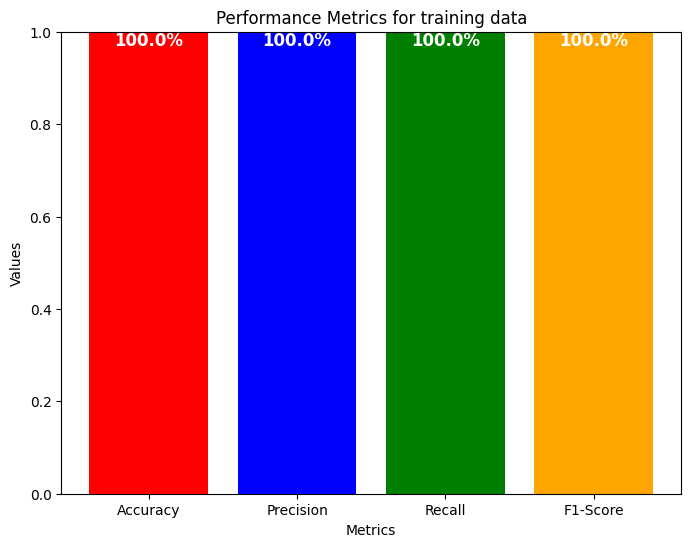

In [52]:
lstm_train_values = [lstm_train_accuracy, lstm_train_precision,
                     lstm_train_recall, train_f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_train_matrix_bars = plt.bar(metrics, lstm_train_values, color=['red',
                                                                    'blue', 'green', 'orange'])
for bar in lstm_train_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for training data')
plt.ylim([0, 1])
plt.show()


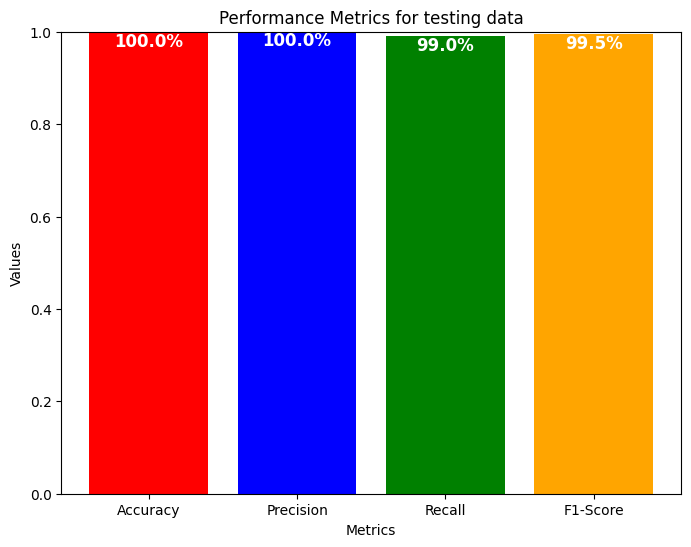

In [53]:
lstm_values = [lstm_accuracy, lstm_precision, lstm_recall, f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_matrix_bars = plt.bar(metrics, lstm_values, color=['red',
                           'blue', 'green', 'orange'])
for bar in lstm_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for testing data')
plt.ylim([0, 1])
plt.show()


In [54]:
# # GRU
# X_train_gru, X_temp_gru, y_train_gru, y_temp_gru = train_test_split(
#     X_scaled, y, test_size=0.2, random_state=40)

# X_val_gru, X_test_gru, y_val_gru, y_test_gru = train_test_split(
#     X_temp_gru, y_temp_gru, test_size=0.3, random_state=40)

# X_train_reshaped_gru = X_train_gru.reshape(-1, 1, X_train_gru.shape[1])
# X_val_reshaped_gru = X_val_gru.reshape(-1, 1, X_val_gru.shape[1])
# X_test_reshaped_gru = X_test_gru.reshape(-1, 1, X_test_gru.shape[1])


# X_train_gru, X_val_gru, y_train_gru, y_val_gru = train_test_split(
#     X_train_n, y_train, test_size=0.2, random_state=40)


In [106]:
gru_model = Sequential()
gru_model.add(GRU(32,
              input_shape=(sequence_length, num_features)))
gru_model.add(Dense(16, activation='tanh'))
gru_model.add(Dropout(0.5))


In [107]:
gru_adam_optimizer = Adam(learning_rate=0.01)
gru_model.compile(optimizer=gru_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
gru_adam_history = gru_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 3s 7ms/step - loss: 5.4679 - accuracy: 0.3067 - val_loss: 0.8174 - val_accuracy: 0.0000e+00
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 3.9341 - accuracy: 0.4290 - val_loss: 0.7512 - val_accuracy: 0.0000e+00
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 3.9056 - accuracy: 0.4404 - val_loss: 0.7705 - val_accuracy: 0.0000e+00
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 3.8524 - accuracy: 0.4634 - val_loss: 0.7468 - val_accuracy: 0.0000e+00
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 5.6337 - accuracy: 0.2745 - val_loss: 0.7717 - val_accuracy: 0.0000e+00
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 7.7427 - accuracy: 0.0264 - val_loss: 0.7718 - val_accuracy: 0.0000e+00
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 7.6361 - accuracy: 0.0282 - val_loss: 0.7718 - val

In [57]:
gru_nadam_optimizer = Nadam(learning_rate=0.01)
gru_model.compile(optimizer=gru_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
gru_nadam_history = gru_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 3s 5ms/step - loss: 7.6556 - accuracy: 0.0389 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 2/10
250/250 [==============================] - 1s 6ms/step - loss: 7.7132 - accuracy: 0.0415 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 3/10
250/250 [==============================] - 2s 6ms/step - loss: 7.7906 - accuracy: 0.0359 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 7.6777 - accuracy: 0.0394 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 7.7005 - accuracy: 0.0422 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 7.6807 - accuracy: 0.0405 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 7.6878 - accuracy: 0.0421 - val_loss: 9.4380 - val

In [58]:
gru_adagrad_optimizer = Adagrad(learning_rate=0.01)
gru_model.compile(optimizer=gru_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
gru_adagrad_history = gru_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 3s 6ms/step - loss: 7.6889 - accuracy: 0.0425 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 7.7055 - accuracy: 0.0429 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 7.7072 - accuracy: 0.0413 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 7.7413 - accuracy: 0.0374 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 7.7188 - accuracy: 0.0413 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 6/10
250/250 [==============================] - 2s 6ms/step - loss: 7.6843 - accuracy: 0.0454 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 7.7010 - accuracy: 0.0397 - val_loss: 9.4380 - val

In [59]:
gru_sgd_optimizer = SGD(learning_rate=0.01)
gru_model.compile(optimizer=gru_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
gru_sgd_history = gru_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 3s 5ms/step - loss: 7.6356 - accuracy: 0.0390 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 7.7214 - accuracy: 0.0401 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 7.7081 - accuracy: 0.0396 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 7.7104 - accuracy: 0.0380 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 7.7803 - accuracy: 0.0441 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 7.5837 - accuracy: 0.0411 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 7.7248 - accuracy: 0.0406 - val_loss: 9.4380 - val

In [60]:
gru_rms_optimizer = RMSprop(learning_rate=0.01)
gru_model.compile(optimizer=gru_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
gru_rms_history = gru_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 2s 6ms/step - loss: 7.7245 - accuracy: 0.0429 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 7.6683 - accuracy: 0.0440 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 7.7154 - accuracy: 0.0402 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 7.7206 - accuracy: 0.0395 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 7.7133 - accuracy: 0.0421 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 7.6725 - accuracy: 0.0445 - val_loss: 9.4380 - val_accuracy: 0.0000e+00
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 7.7310 - accuracy: 0.0389 - val_loss: 9.4380 - val

In [61]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test)
print("Test GRU Loss: ", gru_loss)
print("Test GRU Accuracy: ", gru_accuracy)


63/63 [==============================] - 0s 2ms/step - loss: 9.4394 - accuracy: 0.0000e+00
Test GRU Loss:  9.439361572265625
Test GRU Accuracy:  0.0


In [62]:
gru_train_probs = gru_model.predict(X_train_n, verbose=0)
gru_train_classes = (gru_train_probs > 0.9).astype("int32")

gru_train_probs = gru_train_probs[:, 0]
gru_train_classes = gru_train_classes[:, 0]

gru_train_accuracy = accuracy_score(y_train, gru_train_classes)
print("Accuracy: ", gru_train_accuracy)

gru_train_precision = precision_score(
    y_train, gru_train_classes, zero_division=1)
print("Precision: ", gru_train_precision)

gru_train_recall = recall_score(y_train, gru_train_classes, zero_division=1)
print("Recall: ", gru_train_recall)

train_f1_score_value_gru = f1_score(
    y_train, gru_train_classes, zero_division=1)
print("F1 score: ", train_f1_score_value_gru)

# y_pred = gru_model.predict(X_test)
# y_pred_classes = (y_pred > 0.5).astype("int32")
# report = classification_report(y_test, y_pred_classes)
# print(report)


Accuracy:  0.04825
Precision:  0.04825
Recall:  1.0
F1 score:  0.09205819222513714


In [63]:
gru_probs = gru_model.predict(X_test_n, verbose=0)
gru_classes = (gru_probs > 0.9).astype("int32")

gru_probs = gru_probs[:, 0]
gru_classes = gru_classes[:, 0]

gru_accuracy = accuracy_score(y_test, gru_classes)
print("Accuracy: ", gru_accuracy)

gru_precision = precision_score(y_test, gru_classes, zero_division=1)
print("Precision: ", gru_precision)

gru_recall = recall_score(y_test, gru_classes, zero_division=1)
print("Recall: ", gru_recall)

f1_score_value_gru = f1_score(y_test, gru_classes, zero_division=1)
print("F1 score: ", f1_score_value_gru)


Accuracy:  0.0505
Precision:  0.0505
Recall:  1.0
F1 score:  0.09614469300333175


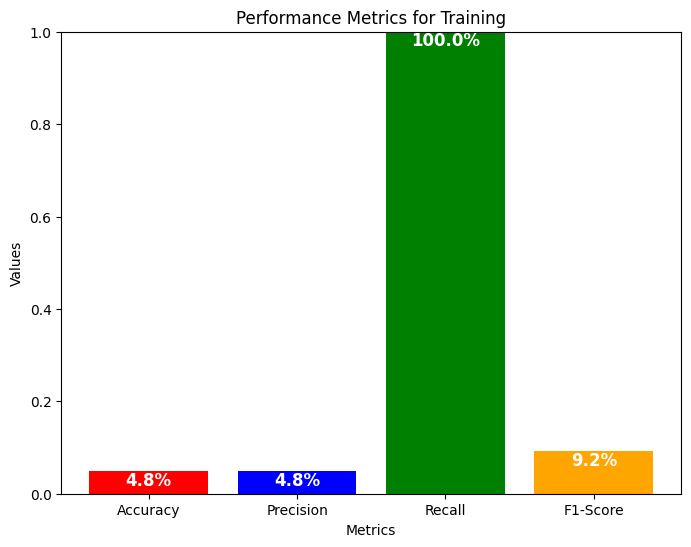

In [64]:
gru_values = [gru_train_accuracy, gru_train_precision,
              gru_train_recall, train_f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Training')
plt.ylim(0, 1)
plt.show()


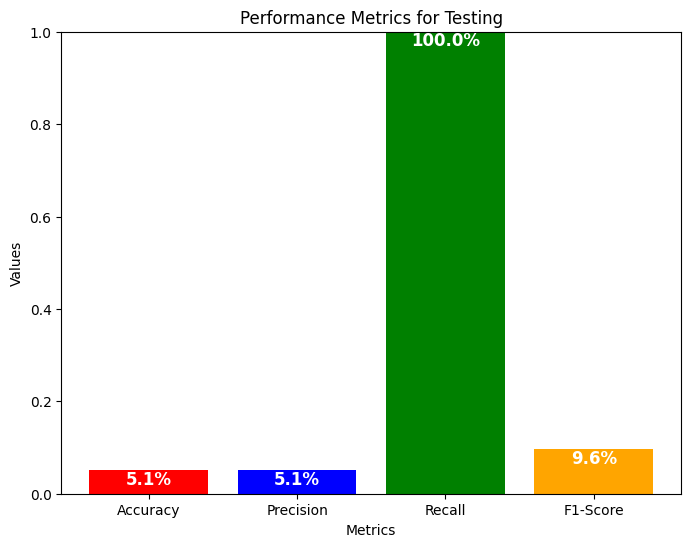

In [65]:
gru_values = [gru_accuracy, gru_precision, gru_recall, f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Testing')
plt.ylim(0, 1)
plt.show()


In [66]:
# CNN
# X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
#     X_scaled, y, test_size=0.2, random_state=40)

# X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
#     X_temp_cnn, y_temp_cnn, test_size=0.3, random_state=40)

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(
    X_train_n, y_train, test_size=0.2, random_state=40)

print("Shape of X_train:", X_train_cnn.shape)

# sequence_length = X_train_cnn.shape[1]
# num_features = 1

# X_train_reshaped_cnn = X_train_cnn.reshape(-1, sequence_length, num_features)
# X_val_reshaped_cnn = X_val_cnn.reshape(-1, sequence_length, num_features)
# X_test_reshaped_cnn = X_test_cnn.reshape(-1, sequence_length, num_features)


Shape of X_train: (6400, 18)


In [67]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=32, kernel_size=3,
              input_shape=(sequence_length, num_features)))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=16, kernel_size=2))

cnn_model.add(MaxPooling1D(pool_size=1))

cnn_model.add(Flatten())

cnn_model.add(Dense(8, activation="relu"))

cnn_model.add(Dropout(0.5))


In [68]:
cnn_adam_optimizer = Adam(learning_rate=0.01)
cnn_model.compile(optimizer=cnn_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adam_history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10,
                                 batch_size=32, validation_data=(X_val_cnn, y_val_cnn))


Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.7308 - accuracy: 0.9463 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 

In [69]:
cnn_nadam_optimizer = Nadam(learning_rate=0.01)
cnn_model.compile(optimizer=cnn_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_nadam_history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10,
                                  batch_size=32, validation_data=(X_val_cnn, y_val_cnn))


Epoch 1/10
200/200 [==============================] - 1s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 

In [70]:
cnn_adagrad_optimizer = Adagrad(learning_rate=0.01)
cnn_model.compile(optimizer=cnn_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adagrad_history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10,
                                    batch_size=32, validation_data=(X_val_cnn, y_val_cnn))


Epoch 1/10
200/200 [==============================] - 1s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 

In [71]:
cnn_sgd_optimizer = SGD(learning_rate=0.01)

cnn_model.compile(optimizer=cnn_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_sgd_history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10,
                                batch_size=32, validation_data=(X_val_cnn, y_val_cnn))


Epoch 1/10
200/200 [==============================] - 1s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 

In [72]:
cnn_rms_optimizer = RMSprop(learning_rate=0.01)

cnn_model.compile(optimizer=cnn_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_rms_history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10,
                                batch_size=32, validation_data=(X_val_cnn, y_val_cnn))


Epoch 1/10
200/200 [==============================] - 1s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.7303 - accuracy: 0.9527 - val_loss: 0.8002 - val_accuracy: 0.9481
Epoch 

In [73]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test CNN Loss: ", cnn_loss)
print("Test CNN Accuracy: ", cnn_accuracy)


63/63 [==============================] - 0s 2ms/step - loss: 3.4207 - accuracy: 0.2080
Test CNN Loss:  3.420743942260742
Test CNN Accuracy:  0.20800000429153442


In [74]:
cnn_train_probs = cnn_model.predict(X_train_n, verbose=0)
cnn_train_classes = (cnn_train_probs > 0.7).astype("int32")

cnn_train_probs = cnn_train_probs[:, 0]
cnn_train_classes = cnn_train_classes[:, 0]

cnn_train_accuracy = accuracy_score(y_train, cnn_train_classes)
print("Accuracy: ", cnn_train_accuracy)

cnn_train_precision = precision_score(
    y_train, cnn_train_classes, zero_division=1)
print("Precision: ", cnn_train_precision)

cnn_train_recall = recall_score(y_train, cnn_train_classes, zero_division=1)
print("Recall: ", cnn_train_recall)

train_f1_score_value_cnn = f1_score(
    y_train, cnn_train_classes, zero_division=1)
print("F1 score: ", train_f1_score_value_cnn)


Accuracy:  0.95175
Precision:  1.0
Recall:  0.0
F1 score:  0.0


In [75]:
cnn_probs = cnn_model.predict(X_test_n, verbose=0)
cnn_classes = (cnn_probs > 0.7).astype("int32")

cnn_probs = cnn_probs[:, 0]
cnn_classes = cnn_classes[:, 0]

cnn_accuracy = accuracy_score(y_test, cnn_classes)
print("Accuracy: ", cnn_accuracy)

cnn_precision = precision_score(y_test, cnn_classes, zero_division=1)
print("Precision: ", cnn_precision)

cnn_recall = recall_score(y_test, cnn_classes, zero_division=1)
print("Recall: ", cnn_recall)

f1_score_value_cnn = f1_score(y_test, cnn_classes, zero_division=1)
print("F1 score: ", f1_score_value_cnn)


Accuracy:  0.9495
Precision:  1.0
Recall:  0.0
F1 score:  0.0


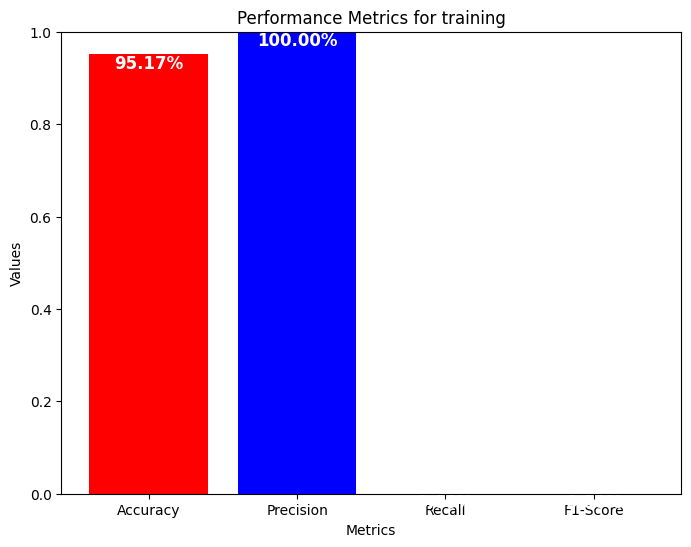

In [76]:
cnn_values = [cnn_train_accuracy, cnn_train_precision,
              cnn_train_recall, train_f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.2f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for training')
plt.ylim(0, 1)
plt.show()


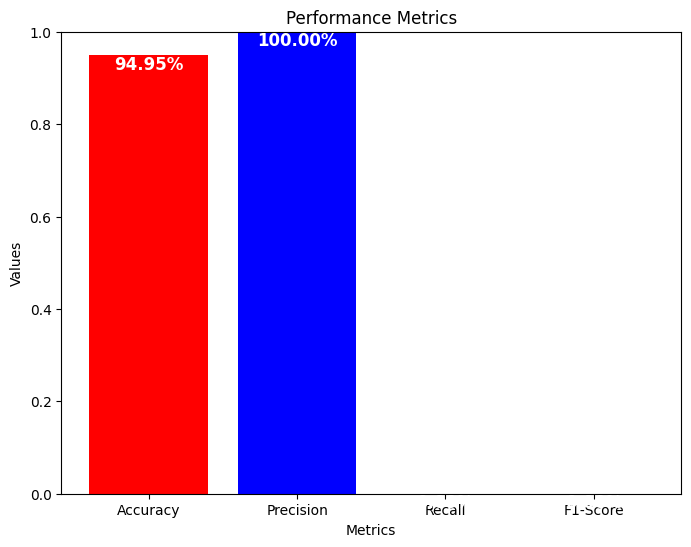

In [77]:
cnn_values = [cnn_accuracy, cnn_precision, cnn_recall, f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.2f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


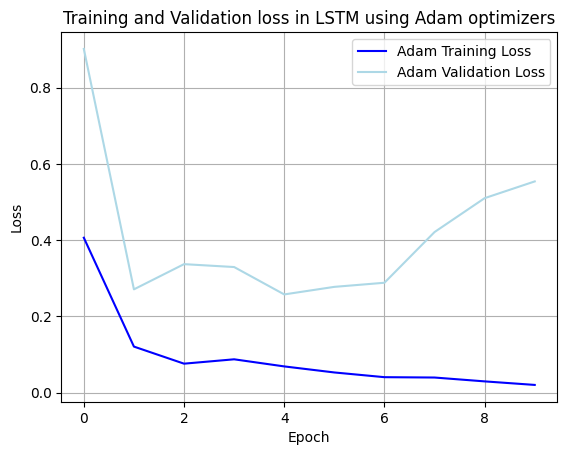

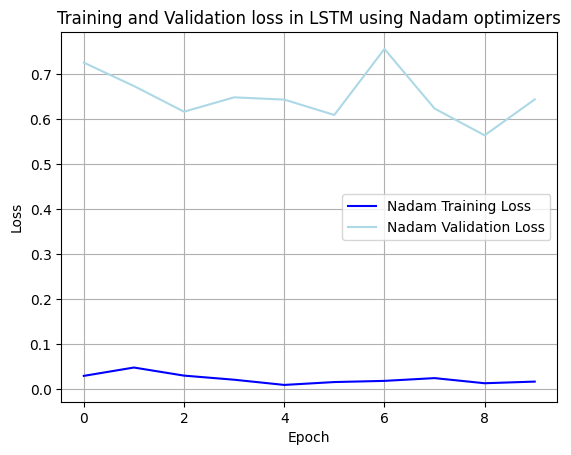

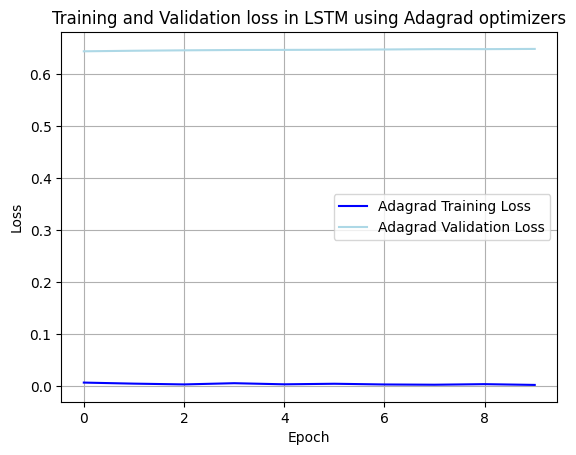

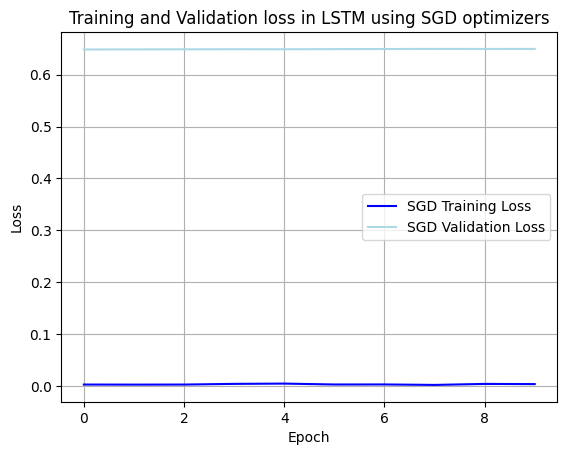

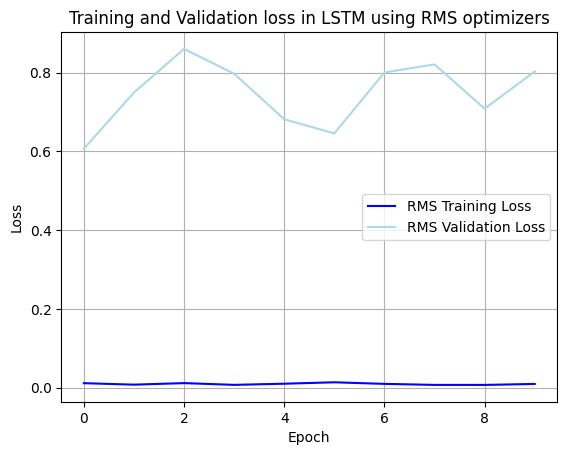

In [78]:
# ----- LSTM Adam Loss -----
plt.plot(lstm_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(lstm_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Loss -----
plt.plot(lstm_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(lstm_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Loss -----
plt.plot(lstm_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(lstm_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Loss -----
plt.plot(lstm_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(lstm_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Loss -----
plt.plot(lstm_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(lstm_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


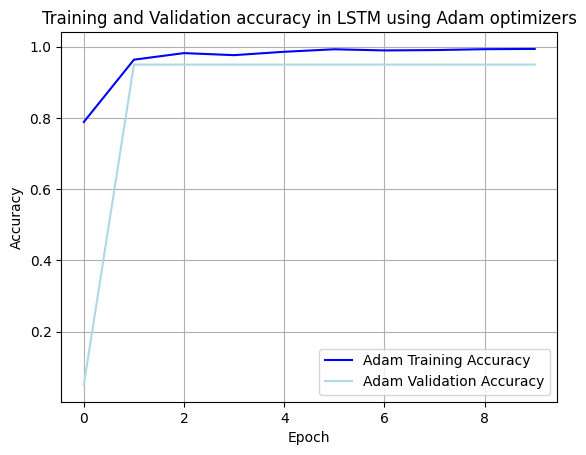

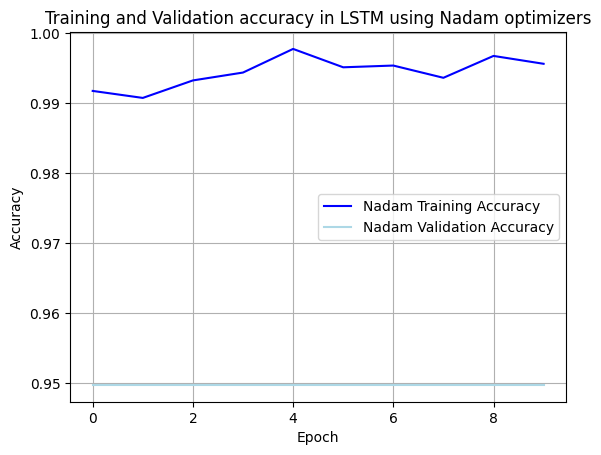

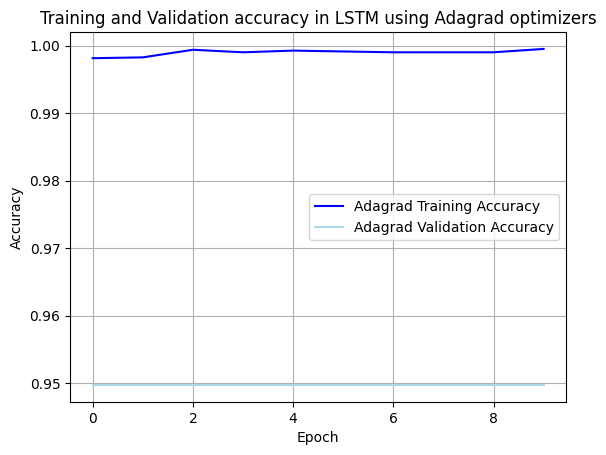

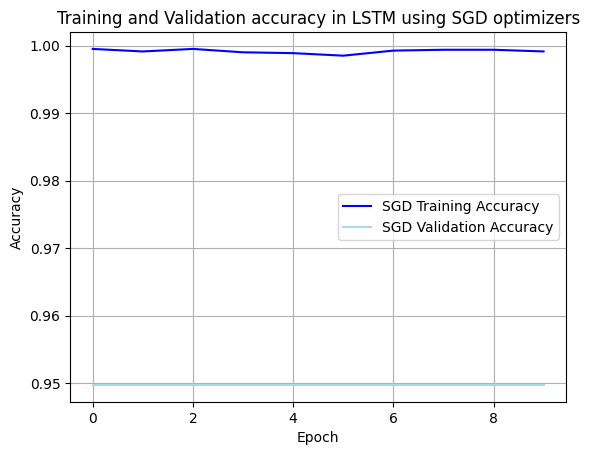

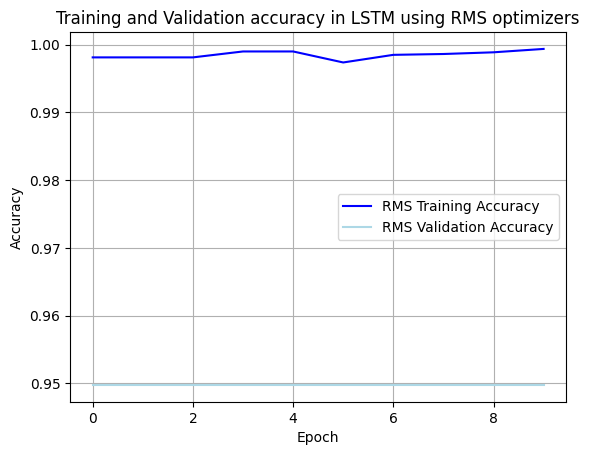

In [79]:
# ----- LSTM Adam Accuracy -----
plt.plot(lstm_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(lstm_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Accuracy -----
plt.plot(lstm_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(lstm_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Accuracy -----
plt.plot(lstm_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(lstm_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Accuracy -----
plt.plot(lstm_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(lstm_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Accuracy -----
plt.plot(lstm_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(lstm_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


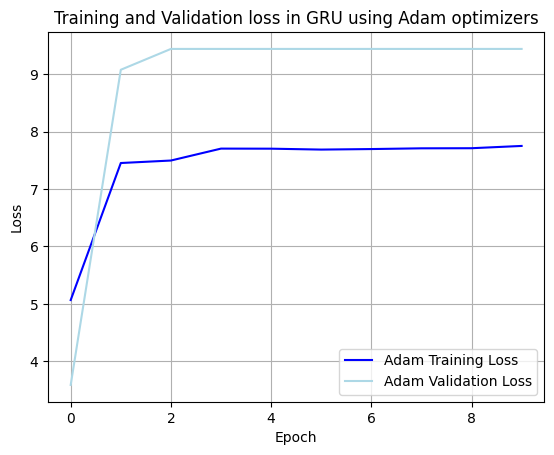

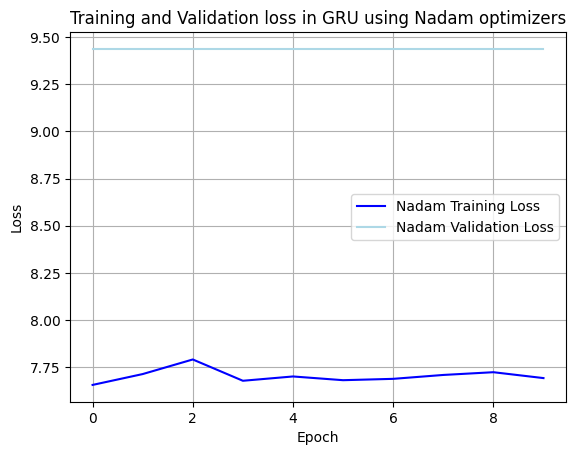

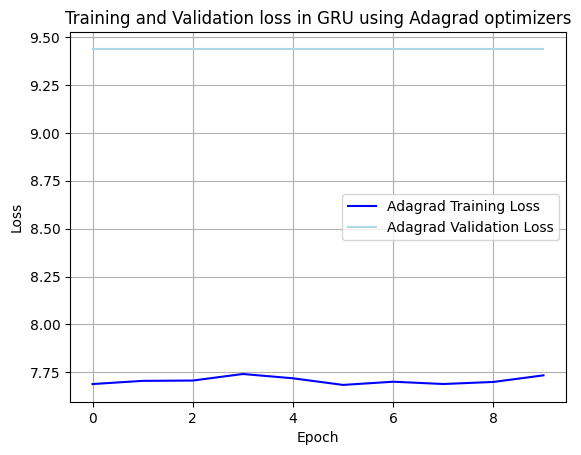

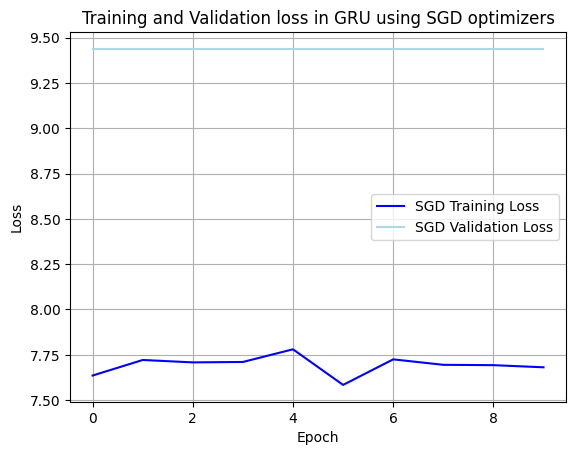

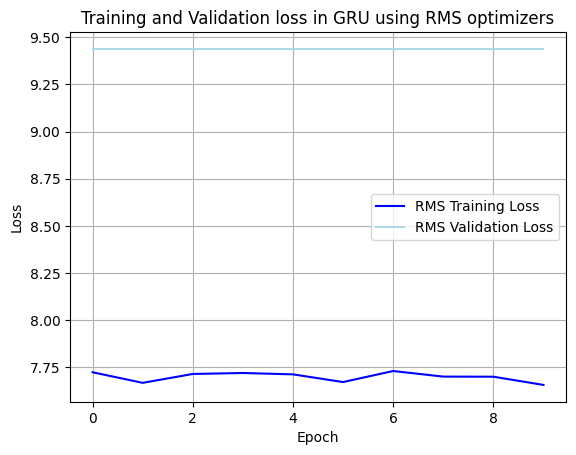

In [80]:
# ----- GRU Adam Loss -----
plt.plot(gru_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(gru_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Loss -----
plt.plot(gru_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(gru_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Loss -----
plt.plot(gru_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(gru_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Loss -----
plt.plot(gru_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(gru_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Loss -----
plt.plot(gru_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(gru_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


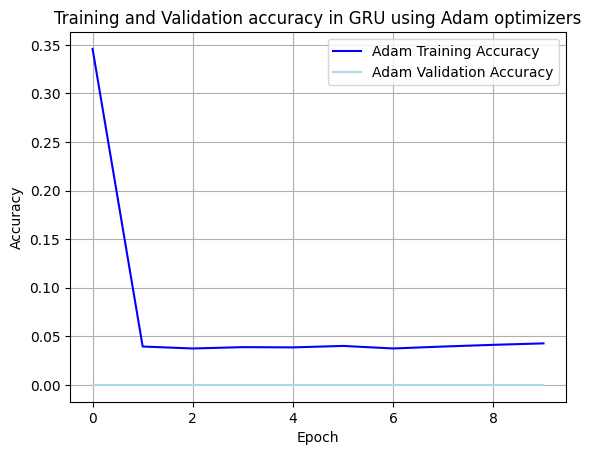

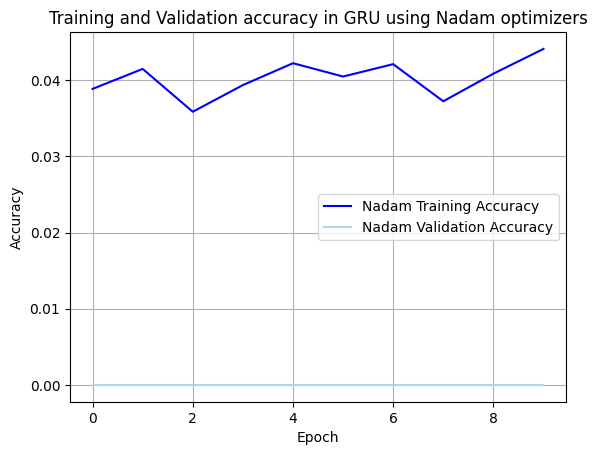

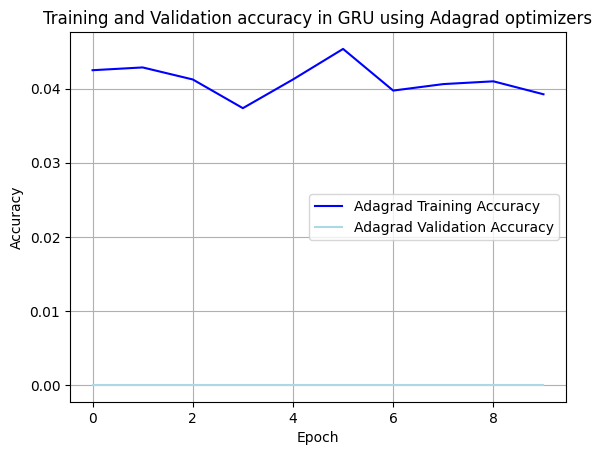

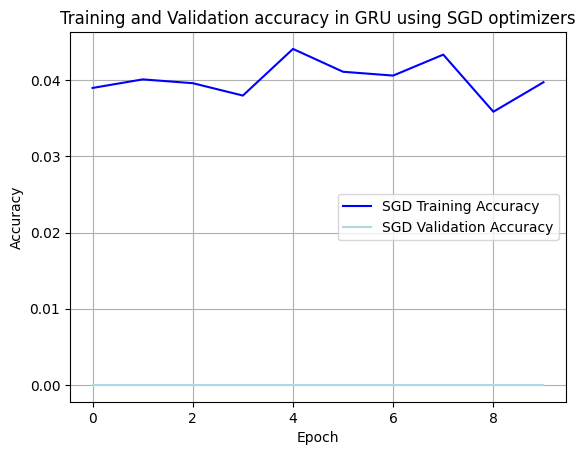

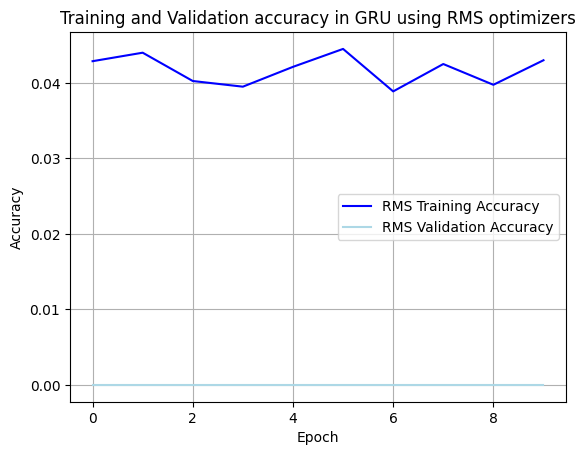

In [81]:
# ----- GRU Adam Accuracy -----
plt.plot(gru_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(gru_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Accuracy -----
plt.plot(gru_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(gru_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Accuracy -----
plt.plot(gru_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(gru_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Accuracy -----
plt.plot(gru_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(gru_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Accuracy -----
plt.plot(gru_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(gru_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


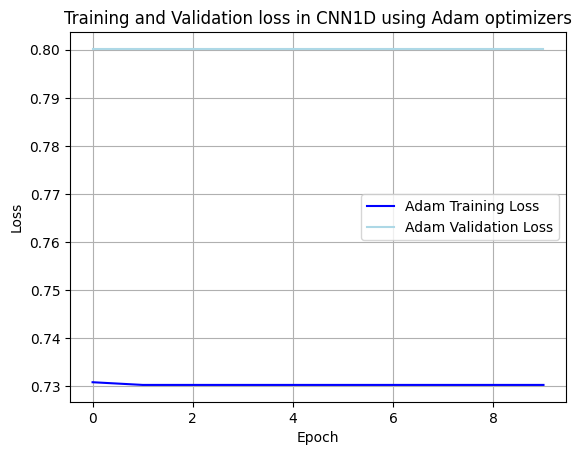

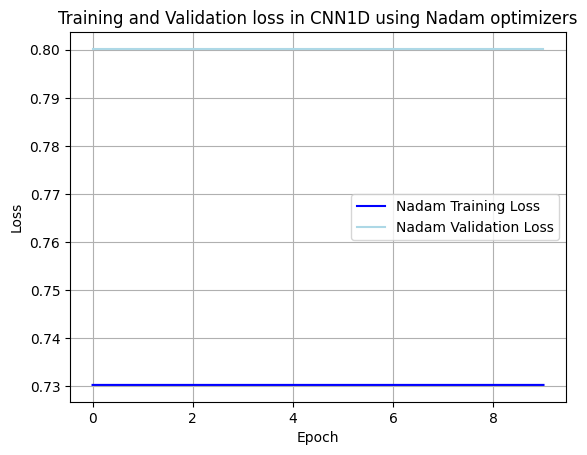

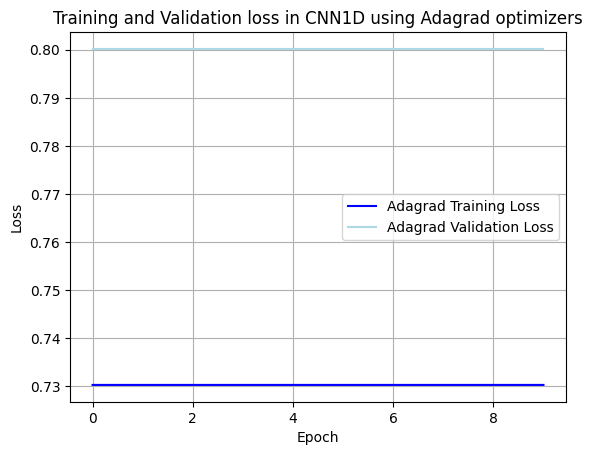

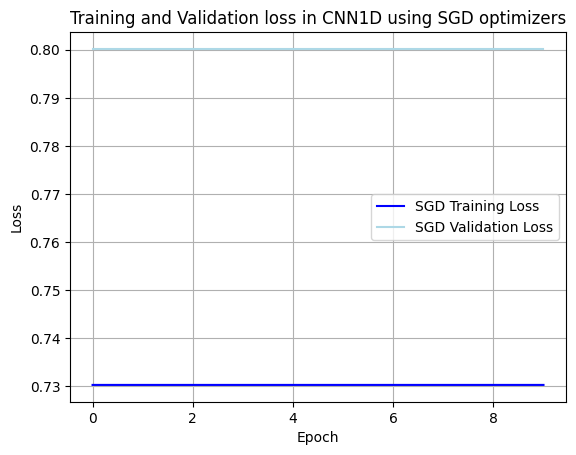

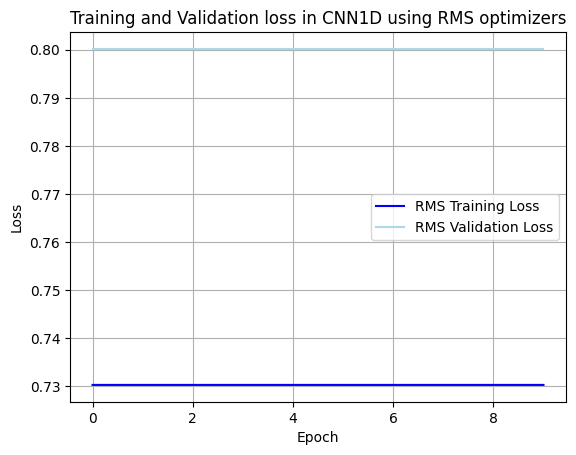

In [82]:
# ----- CNN1D Adam Loss -----
plt.plot(cnn_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(cnn_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Nadam Loss -----
plt.plot(cnn_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(cnn_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Adgrad Loss -----
plt.plot(cnn_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(cnn_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D SGD Loss -----
plt.plot(cnn_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(cnn_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D RMSProp Loss -----
plt.plot(cnn_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(cnn_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


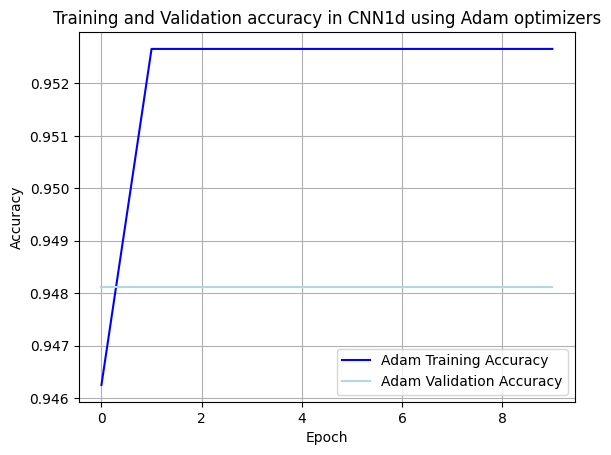

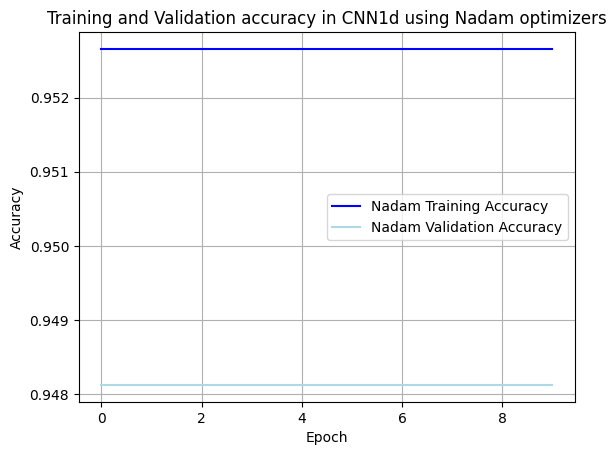

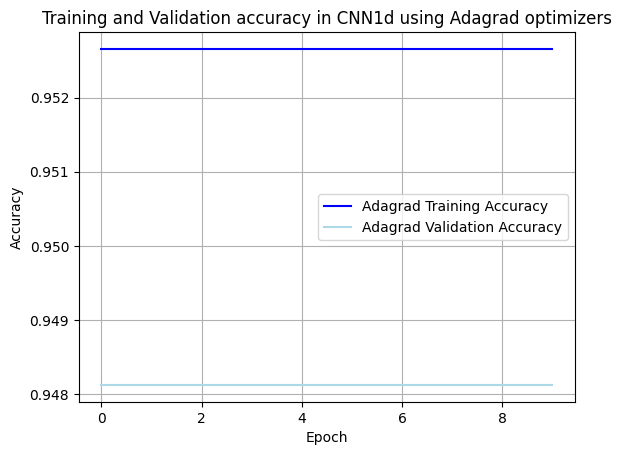

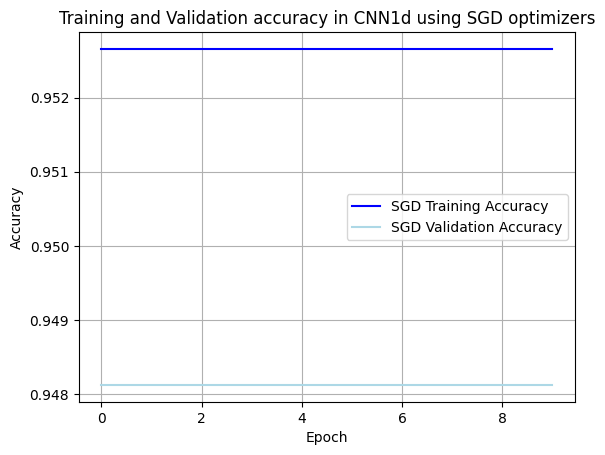

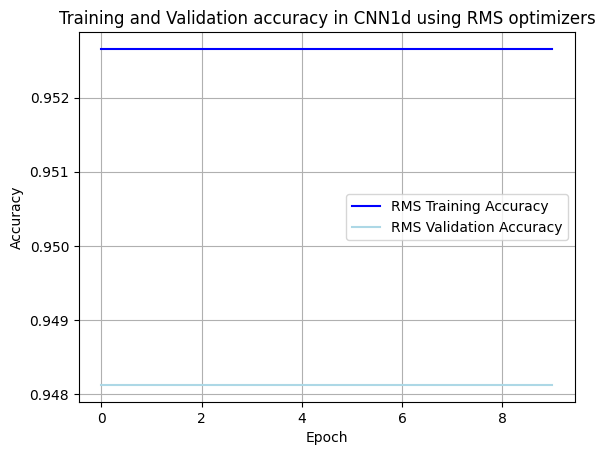

In [83]:
# ----- CNN1d Adam Accuracy -----
plt.plot(cnn_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(cnn_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Nadam Accuracy -----
plt.plot(cnn_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(cnn_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Adgrad Accuracy -----
plt.plot(cnn_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(cnn_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d SGD Accuracy -----
plt.plot(cnn_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(cnn_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d RMSProp Accuracy -----
plt.plot(cnn_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(cnn_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [84]:
# plt.figure(figsize=(12, 6))

# cnn_adam_h = np.mean(cnn_adam_history.history['loss'])
# cnn_nadam_h = np.mean(cnn_nadam_history.history['loss'])
# cnn_adagrad_h = np.mean(cnn_adagrad_history.history['loss'])
# cnn_sgd_h = np.mean(cnn_sgd_history.history['loss'])
# cnn_rms_h = np.mean(cnn_rms_history.history['loss'])

# cnn_adam_h_v = np.mean(cnn_adam_history.history['val_loss'])
# cnn_nadam_h_v = np.mean(cnn_nadam_history.history['val_loss'])
# cnn_adagrad_h_v = np.mean(cnn_adagrad_history.history['val_loss'])
# cnn_sgd_h_v = np.mean(cnn_sgd_history.history['val_loss'])
# cnn_rms_h_v = np.mean(cnn_rms_history.history['val_loss'])

# cnn_optimizers = [cnn_adam_h, cnn_nadam_h,
#                   cnn_adagrad_h, cnn_sgd_h, cnn_rms_h]
# cnn_optimizers_v = [cnn_adam_h_v, cnn_nadam_h_v,
#                     cnn_adagrad_h_v, cnn_sgd_h_v, cnn_rms_h_v]

# plt.plot(cnn_optimizers, label="Loss", color='blue')
# plt.plot(cnn_optimizers_v, label="Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [85]:
# plt.figure(figsize=(12, 6))

# cnn_adam_acc = np.mean(cnn_adam_history.history['accuracy'])
# cnn_nadam_acc = np.mean(cnn_nadam_history.history['accuracy'])
# cnn_adagrad_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_sgd_acc = np.mean(cnn_sgd_history.history['accuracy'])
# cnn_rms_acc = np.mean(cnn_rms_history.history['accuracy'])

# cnn_adam_val_acc = np.mean(cnn_adam_history.history['val_accuracy'])
# cnn_nadam_val_acc = np.mean(cnn_nadam_history.history['val_accuracy'])
# cnn_adagrad_val_acc = np.mean(cnn_adagrad_history.history['val_accuracy'])
# cnn_sgd_val_acc = np.mean(cnn_sgd_history.history['val_accuracy'])
# cnn_rms_val_acc = np.mean(cnn_rms_history.history['val_accuracy'])


# cnn_optimizers_acc = [cnn_adam_acc, cnn_nadam_acc,
#                       cnn_adagrad_acc, cnn_sgd_acc, cnn_rms_acc]
# cnn_optimizers_val_acc = [cnn_adam_val_acc, cnn_nadam_val_acc,
#                           cnn_adagrad_val_acc, cnn_sgd_val_acc, cnn_rms_val_acc]

# plt.plot(cnn_optimizers_acc, label="Accuracy", color='blue')
# plt.plot(cnn_optimizers_val_acc, label="Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [86]:
models = ['LSTM', 'GRU', '1D-CNN']


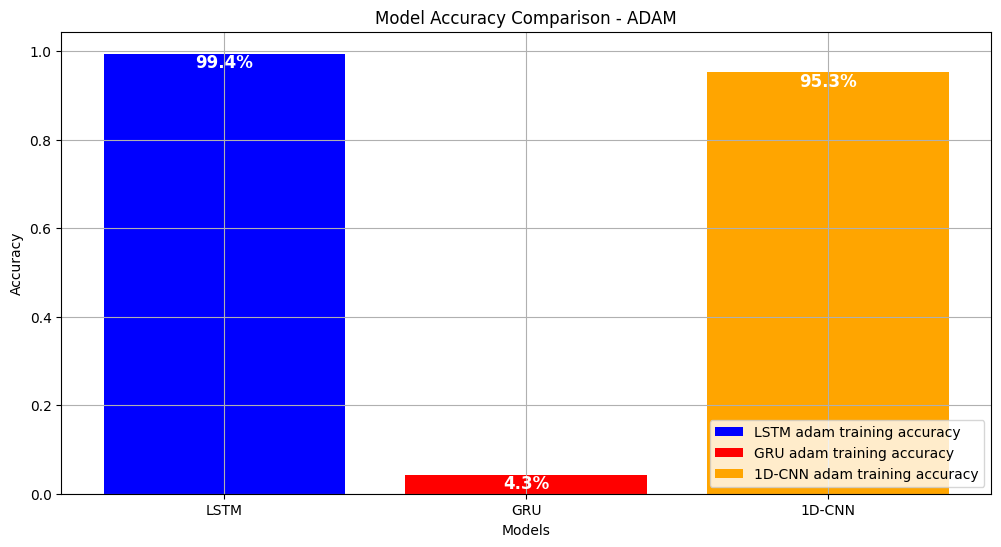

In [87]:
plt.figure(figsize=(12, 6))

# lstm_adam_train_acc = np.mean(lstm_adam_history.history["accuracy"])
# lstm_adam_val_acc = np.mean(lstm_adam_history.history["val_accuracy"])

# gru_adam_train_acc = np.mean(gru_adam_history.history["accuracy"])
# gru_adam_val_acc = np.mean(gru_adam_history.history["val_accuracy"])

# cnn_adam_train_acc = np.mean(cnn_adam_history.history["accuracy"])
# cnn_adam_val_acc = np.mean(cnn_adam_history.history["val_accuracy"])

adam_histories = [lstm_adam_history, gru_adam_history, cnn_adam_history]

# adam_accuracies = [lstm_adam_train_acc, gru_adam_train_acc, cnn_adam_train_acc]

adam_accuracies = [a_history.history['accuracy'][-1]
                   for a_history in adam_histories]

adam_bar = plt.bar(models, adam_accuracies, label=['LSTM adam training accuracy',
                                                   'GRU adam training accuracy', '1D-CNN adam training accuracy'], color=['blue', 'red', 'orange'])

for bar in adam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title("Model Accuracy Comparison - ADAM")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


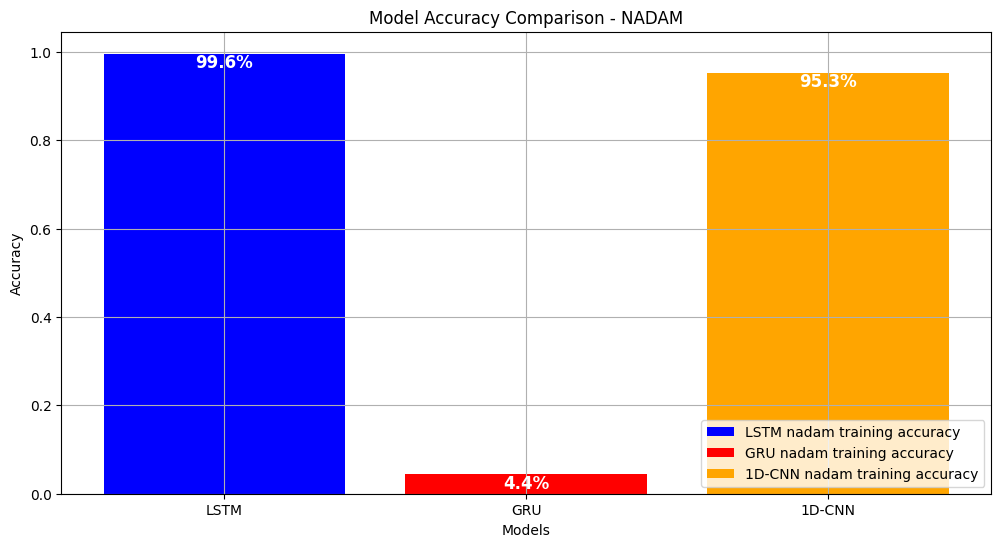

In [88]:
plt.figure(figsize=(12, 6))

# lstm_nadam_train_acc = np.mean(lstm_nadam_history.history["accuracy"])
# lstm_nadam_val_acc = lstm_nadam_history.history["val_accuracy"]

# gru_nadam_train_acc = np.mean(gru_nadam_history.history["accuracy"])
# gru_nadam_val_acc = gru_nadam_history.history["val_accuracy"]

# cnn_nadam_train_acc = np.mean(cnn_nadam_history.history["accuracy"])
# cnn_nadam_val_acc = cnn_nadam_history.history["val_accuracy"]

# nadam_accuracies = [lstm_nadam_train_acc,
#                     gru_nadam_train_acc, cnn_nadam_train_acc]

nadam_histories = [lstm_nadam_history, gru_nadam_history, cnn_nadam_history]

nadam_accuracies = [n_history.history['accuracy'][-1]
                    for n_history in nadam_histories]

nadam_bar = plt.bar(models, nadam_accuracies, label=['LSTM nadam training accuracy',
                                                     'GRU nadam training accuracy', '1D-CNN nadam training accuracy'], color=['blue', 'red', 'orange'])

for bar in nadam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - NADAM')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


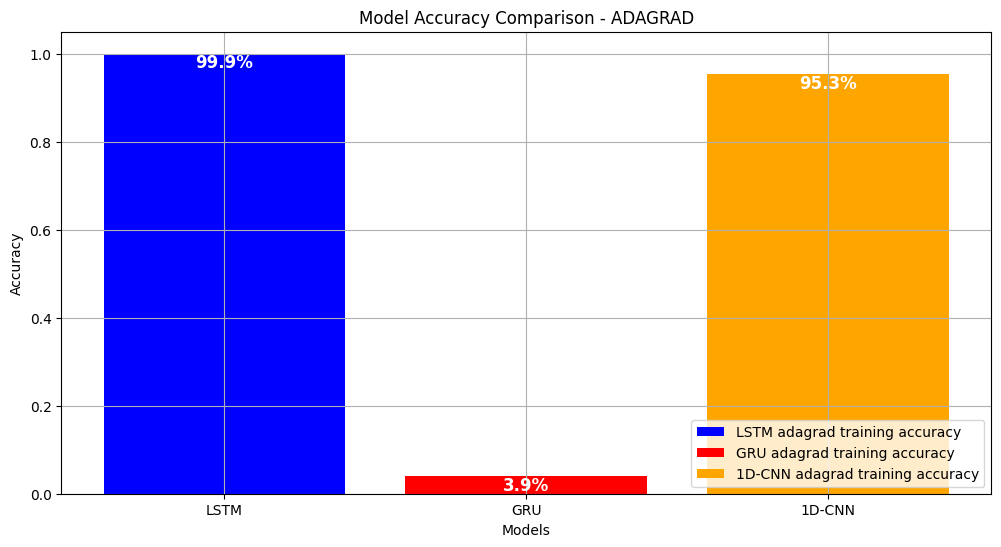

In [89]:
plt.figure(figsize=(12, 6))

# lstm_adagrad_train_acc = np.mean(lstm_adagrad_history.history['accuracy'])
# lstm_adagrad_val_acc = lstm_adagrad_history.history['val_accuracy']

# gru_adagrad_train_acc = np.mean(gru_adagrad_history.history['accuracy'])
# gru_adagrad_val_acc = gru_adagrad_history.history['val_accuracy']

# cnn_adagrad_train_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_adagrad_val_acc = cnn_adagrad_history.history['val_accuracy']

# adagrad_accuracies = [lstm_adagrad_train_acc,
#                       gru_adagrad_train_acc, cnn_adagrad_train_acc]

adagrad_histories = [lstm_adagrad_history,
                     gru_adagrad_history, cnn_adagrad_history]

adagrad_accuracies = [ad_history.history['accuracy'][-1]
                      for ad_history in adagrad_histories]

adagrad_bar = plt.bar(models, adagrad_accuracies,  label=['LSTM adagrad training accuracy',
                                                          'GRU adagrad training accuracy', '1D-CNN adagrad training accuracy'], color=['blue', 'red',  'orange'])

for bar in adagrad_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - ADAGRAD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


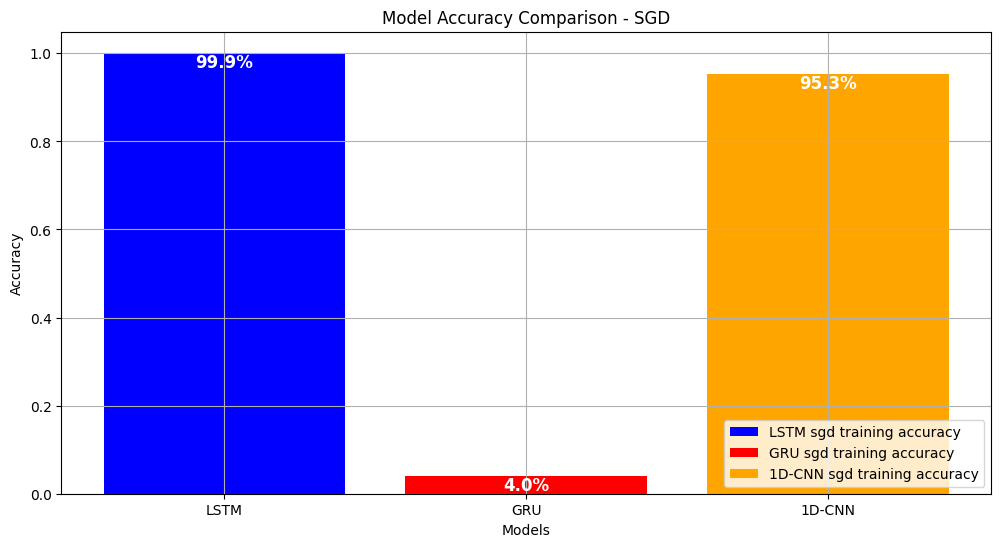

In [90]:
plt.figure(figsize=(12, 6))

# lstm_sgd_train_acc = np.mean(lstm_sgd_history.history['accuracy'])

# gru_sgd_train_acc = np.mean(gru_sgd_history.history['accuracy'])

# cnn_sgd_train_acc = np.mean(cnn_sgd_history.history['accuracy'])

# sgd_accuracies = [lstm_sgd_train_acc,
#                   gru_sgd_train_acc, cnn_sgd_train_acc]

sgd_histories = [lstm_sgd_history, gru_sgd_history, cnn_sgd_history]

sgd_accuracies = [sgd_history.history['accuracy'][-1]
                  for sgd_history in sgd_histories]

sgd_bar = plt.bar(models, sgd_accuracies,  label=['LSTM sgd training accuracy',
                                                  'GRU sgd training accuracy', '1D-CNN sgd training accuracy'], color=['blue', 'red',  'orange'])

for bar in sgd_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - SGD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


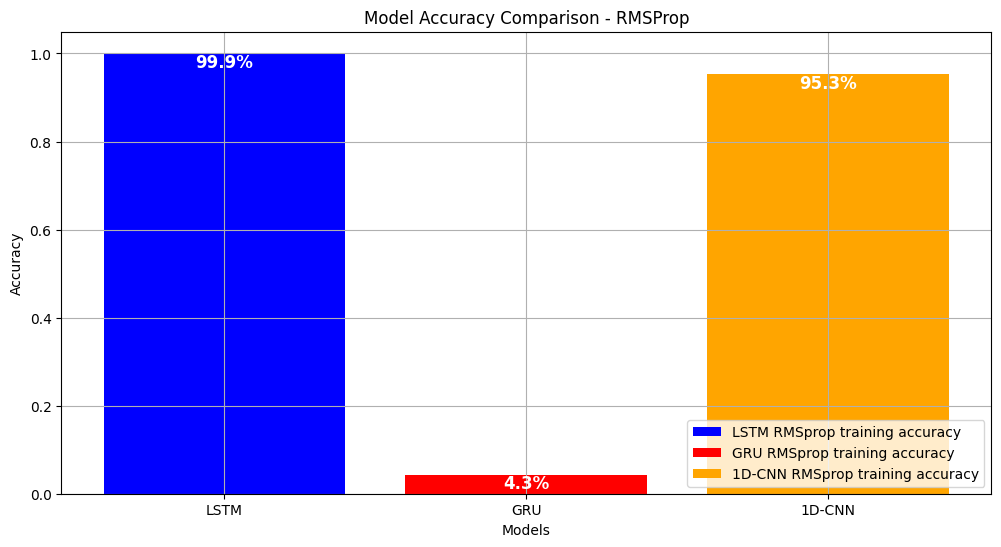

In [91]:
plt.figure(figsize=(12, 6))

# lstm_rms_train_acc = np.mean(lstm_rms_history.history['accuracy'])
# gru_rms_train_acc = np.mean(gru_rms_history.history['accuracy'])
# cnn_rms_train_acc = np.mean(cnn_rms_history.history['accuracy'])

# rms_accuracies = [lstm_rms_train_acc, gru_rms_train_acc, cnn_rms_train_acc]

rms_histories = [lstm_rms_history, gru_rms_history, cnn_rms_history]

rms_accuracies = [rms_history.history['accuracy'][-1]
                  for rms_history in rms_histories]

rms_bar = plt.bar(models, rms_accuracies, label=['LSTM RMSprop training accuracy',
                                                 'GRU RMSprop training accuracy', '1D-CNN RMSprop training accuracy'], color=['blue', 'red',  'orange'])

for bar in rms_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - RMSProp')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


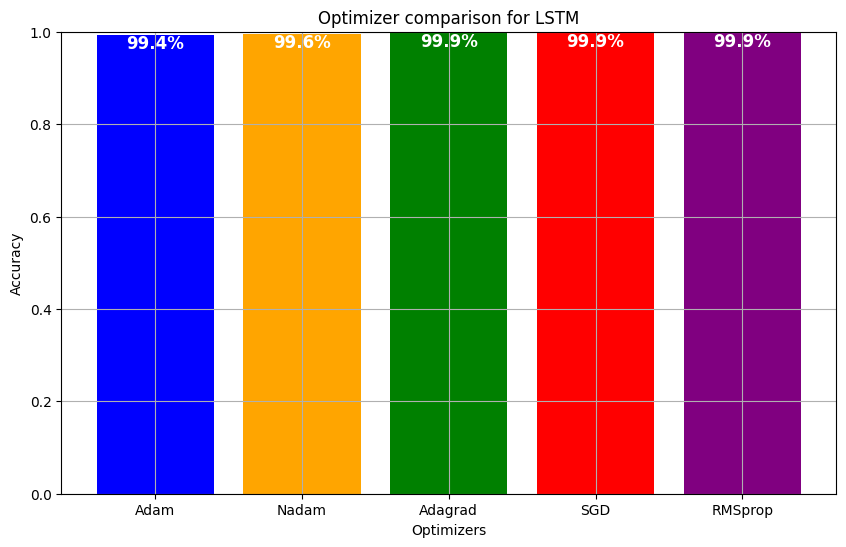

In [92]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
lstm_histories = [lstm_adam_history, lstm_nadam_history,
                  lstm_adagrad_history, lstm_sgd_history, lstm_rms_history]

plt.figure(figsize=(10, 6))

lstm_accuracies = [history.history['accuracy'][-1]
                   for history in lstm_histories]

lstm_bars = plt.bar(optimizers, lstm_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for LSTM")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in lstm_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()


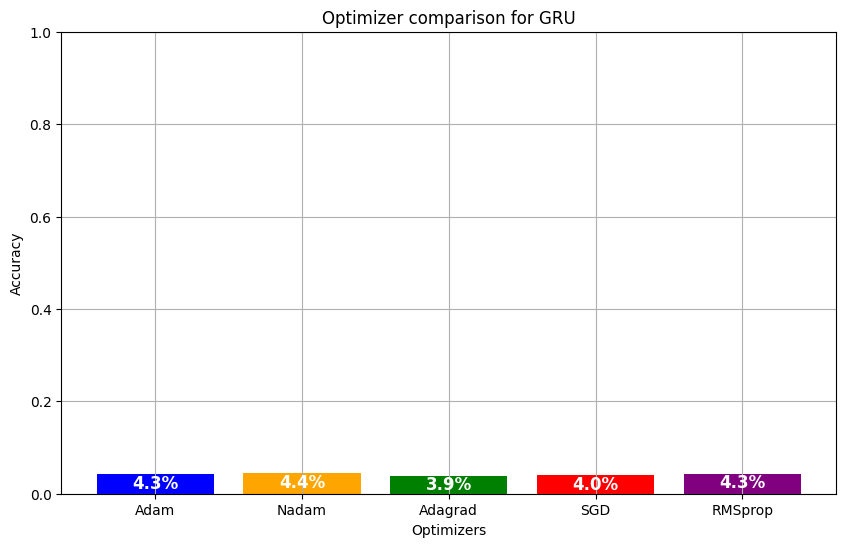

In [93]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
gru_histories = [gru_adam_history, gru_nadam_history,
                 gru_adagrad_history, gru_sgd_history, gru_rms_history]

plt.figure(figsize=(10, 6))

gru_accuracies = [history.history['accuracy'][-1] for history in gru_histories]

gru_bars = plt.bar(optimizers, gru_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for GRU")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in gru_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()


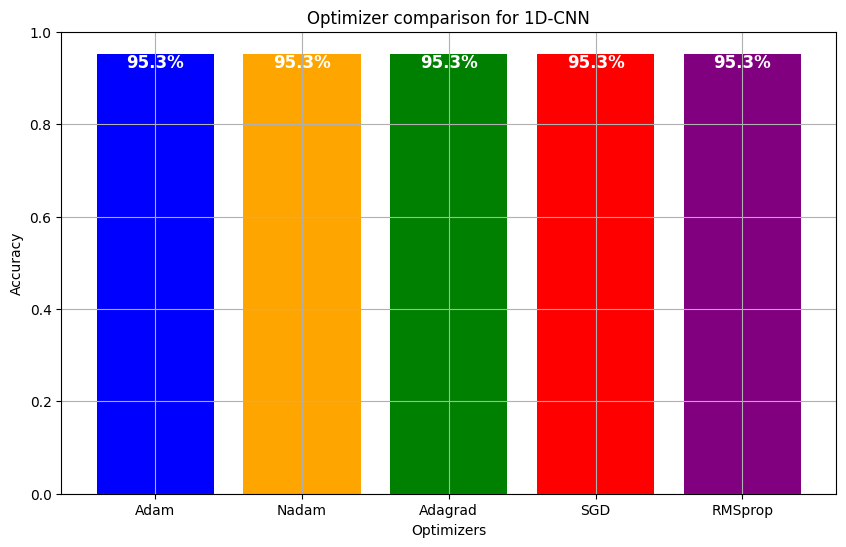

In [94]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
cnn_histories = [cnn_adam_history, cnn_nadam_history,
                 cnn_adagrad_history, cnn_sgd_history, cnn_rms_history]

plt.figure(figsize=(10, 6))

cnn_accuracies = [history.history['accuracy'][-1] for history in cnn_histories]

cnn_bars = plt.bar(optimizers, cnn_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for 1D-CNN")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in cnn_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()
